In [ ]:
#!pip install clarifai-grpc

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2



In [21]:
channel = ClarifaiChannel.get_grpc_channel()
stub = service_pb2_grpc.V2Stub(channel)
metadata = (('authorization', 'Key 88bd12794cbd4bd99b619c186dbbb32e'),)


In [22]:
food_model = '9504135848be0dd2c39bdab0002f78e9'
food_item = 'bd367be194cf45149e75f01d59f77ba7'
general = '9f54c0342741574068ec696ddbebd699'
general_classfier = 'aaa03c23b3724a16a56b629203edc62c'
face_dector = 'f76196b43bbd45c99b4f3cd8e8b40a8a'

In [24]:
def Clarifai_General_Model(stub, metadata,file_bytes):
    general = '9f54c0342741574068ec696ddbebd699'
    model = general
    post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(
        model_id=model,
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    )

    if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
        raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)

    # Since we have one input, one output will exist here.
    
    output = post_model_outputs_response.outputs[0]

    print("Predicted concepts:")
    rlt = []
    for region in output.data.regions:
        concept = region.data.concepts[0]
        rlt.append({'name': concept.name, 'value': concept.value})
        print("%s %.2f" %(concept.name,concept.value))
    return(rlt)


In [25]:
def Clarifai_Food_Model(stub, metadata,file_bytes,model = None):
    food_model = '9504135848be0dd2c39bdab0002f78e9'
    food_item = 'bd367be194cf45149e75f01d59f77ba7'
    if not model:
        model = food_item
        
    post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(
        model_id=model,
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    )

    if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
        raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)

    # Since we have one input, one output will exist here.
    
    output = post_model_outputs_response.outputs[0]

    print("Predicted concepts:")
    rlt = []
    for concept in output.data.concepts:
        rlt.append({'name': concept.name, 'value': concept.value})
        print("%s %.2f" % (concept.name, concept.value))
    return(rlt)
        


In [26]:
def Clarifai_General_Model2(stub, metadata,file_bytes,model = None):
    general_classfier = 'aaa03c23b3724a16a56b629203edc62c'
    MAX_CONCEPT = 10
    if not model:
        model = general_classfier;
    post_model_outputs_response = stub.PostModelOutputs(
        service_pb2.PostModelOutputsRequest(
            model_id=model,  # This is model ID of the publicly available General model.
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            #url="https://samples.clarifai.com/metro-north.jpg"
                            base64 = file_bytes
                        )
                    )
                )
            ],
            model=resources_pb2.Model(
                output_info=resources_pb2.OutputInfo(
                    output_config=resources_pb2.OutputConfig(
                        language="zh",  # Chinese
                        max_concepts=MAX_CONCEPT
                    )
                )
            )
        ),
        metadata=metadata
    )

    if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
        raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)

    # Since we have one input, one output will exist here.
    output = post_model_outputs_response.outputs[0]

    print("Predicted concepts:")
    rlt = []
    for concept in output.data.concepts:
        rlt.append({'name': concept.name, 'value': concept.value})
        print("\t%s %.2f" % (concept.name, concept.value))

    return(rlt)
    

In [27]:
def Food_Image_Analysis(file_path,stub,metadata):
    
    image = Image.open(file_path)
    plt.imshow(image)
    plt.show()
    
    with open(file_path, "rb") as f:
        img_file = f.read()
        
    output = Clarifai_Food_Model(stub, metadata,img_file)
    
    return(output)

    
    

In [28]:
def General_Image_Analysis(file_path,stub,metadata):
    
    image = Image.open(file_path)
    plt.imshow(image)
    plt.show()
    
    with open(file_path, "rb") as f:
        img_file = f.read()
        
    output = Clarifai_General_Model(stub, metadata,img_file);
    
    return(output)

    

In [29]:
def General_Image_Analysis2(file_path,stub,metadata,model = None):
    
    image = Image.open(file_path)
    plt.imshow(image)
    plt.show()
    
    with open(file_path, "rb") as f:
        img_file = f.read()
        
    output = Clarifai_General_Model2(stub, metadata,img_file,model = model);
    
    return(output)

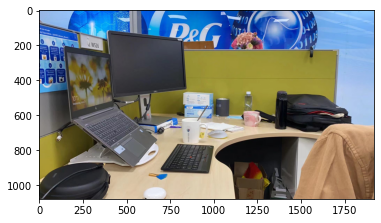

Predicted concepts:
Office building 0.94
Computer monitor 0.90
Computer keyboard 0.84
Computer keyboard 0.82
Desk 0.81
Laptop 0.71
Computer monitor 0.59
Clothing 0.47
Computer monitor 0.36
Office supplies 0.35
Computer monitor 0.33
Office supplies 0.32
Office supplies 0.26


In [31]:
file_path='pics/IMG_5288.JPG'
output = General_Image_Analysis(file_path,stub,metadata);

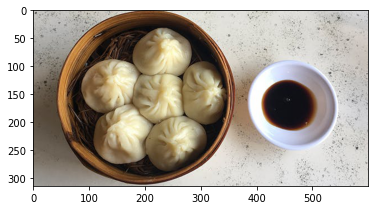

Predicted concepts:
dumpling 1.00
pork 0.96
dough 0.93
gyoza 0.93
meat 0.91
ravioli 0.90
flour 0.90
pasta 0.68
soup 0.64
tortellini 0.63
bun 0.63
pastry 0.57
vegetable 0.50
sweet 0.49
bread 0.47
rice 0.39
chicken 0.36
broth 0.33
tea 0.32
dairy product 0.30


In [34]:
Food_Image_Analysis('pics/food1.jpeg',stub,metadata);

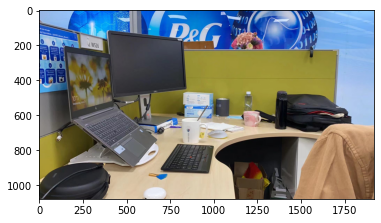

Predicted concepts:
	计算机 0.96
	在室内 0.96
	现代的 0.96
	咖啡 0.96
	书桌 0.95
	商业 0.95
	因特网 0.95
	沒有人 0.93
	技术 0.93
	纸 0.93
	办公室 0.90
	电话 0.89
	家具 0.88
	电子学 0.88
	家庭 0.85
	女人 0.85
	椅子 0.85
	屏幕 0.84
	人 0.83
	男性 0.82


In [160]:
file_path = 'pics/IMG_5288.JPG'
image = Image.open(file_path)
plt.imshow(image)
plt.show()

with open(file_path, "rb") as f:
    img_file = f.read()
    
Clarifai_General_Model2(stub, metadata,img_file)

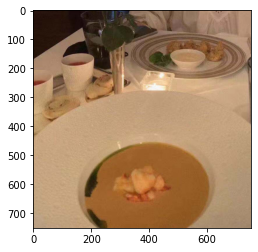

Predicted concepts:
	汤 0.99
	食品 0.99
	生长 0.98
	沒有人 0.97
	人 0.96
	餐具 0.96
	奶油 0.95
	板 0.95
	奶油 0.95
	餐具 0.95
	碗 0.94
	餐具 0.94
	面包 0.93
	蔬菜 0.92
	菜肴 0.92
	乳制品 0.90
	晚餐 0.90
	餐 0.88
	勺子 0.88
	开胃菜 0.87


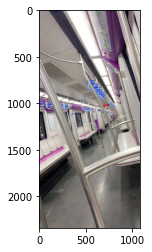

Predicted concepts:
	铁路列车 1.00
	地铁 1.00
	火车 0.99
	站 0.99
	铁路 0.98
	运输系统 0.97
	公共 0.97
	机场 0.97
	自动楼梯 0.97
	城市的 0.96
	现代 0.96
	城市 0.96
	在室内 0.95
	里面 0.95
	管 0.95
	旅游 0.94
	有轨电车（工业） 0.93
	窗户 0.93
	光 0.93
	商业 0.93


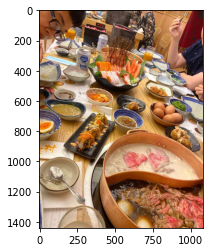

Predicted concepts:
	食品 0.99
	餐 0.97
	汤 0.96
	餐厅 0.96
	菜肴 0.96
	桌子 0.96
	蔬菜 0.95
	肉 0.95
	晚餐 0.94
	午餐 0.94
	板 0.94
	餐饮 0.94
	烹饪 0.93
	传统的 0.92
	喝 0.92
	碗 0.91
	人 0.89
	勺子 0.88
	健康 0.88
	文化 0.87


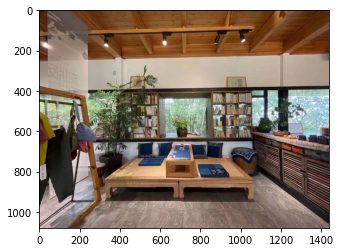

Predicted concepts:
	在室内 1.00
	家具 1.00
	房间 1.00
	室内设计 0.99
	桌子 0.99
	座位 0.98
	椅子 0.98
	楼层 0.98
	书架 0.97
	木 0.96
	书橱 0.96
	住房 0.95
	沙发 0.95
	地毯 0.95
	房子 0.94
	天花板 0.94
	窗户 0.94
	里面 0.92
	沒有人 0.92
	豪华 0.91


In [167]:
file_list = ['IMG_5292.JPG','IMG_5293.JPG','IMG_5294.JPG','IMG_5295.JPG']
folder = 'pics/'
for file_path in file_list:
    General_Image_Analysis2(folder+file_path,stub,metadata);

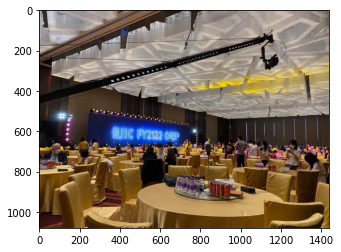

Predicted concepts:
	展览会 0.98
	桌子 0.98
	餐厅 0.97
	节日 0.97
	椅子 0.97
	会议 0.96
	在室内 0.96
	旅游 0.95
	人 0.95
	商业 0.95


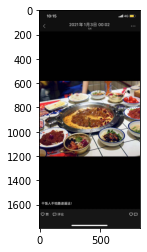

Predicted concepts:
	食品 1.00
	餐厅 0.99
	晚餐 0.99
	餐 0.99
	菜肴 0.99
	午餐 0.99
	肉 0.99
	烹饪 0.98
	烹饪 0.98
	板 0.98


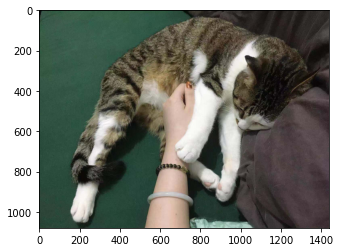

Predicted concepts:
	猫 1.00
	宠物 0.99
	小猫 0.99
	可爱 0.99
	哺乳动物 0.99
	动物 0.99
	毛皮 0.98
	虎斑猫 0.96
	一 0.96
	肖像 0.95


In [175]:
file_list = ['IMG_5300.JPG','IMG_5301.JPG','IMG_5302.JPG']
folder = 'pics/'
for file_path in file_list:
    General_Image_Analysis2(folder+file_path,stub,metadata);

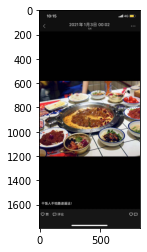

Predicted concepts:
chicken 0.93
feast 0.89
soup 0.88
vegetable 0.84
salad 0.83
meat 0.76
curry 0.76
platter 0.75
turkey 0.73
rice 0.69
pizza 0.68
sweet 0.68
sauce 0.67
paella 0.66
spread 0.65
seafood 0.62
chili 0.60
pork 0.59
beef 0.56
supper 0.55


id: "83876a932ba74ef48cb59d7ba9dd58c0"
status {
  code: SUCCESS
  description: "Ok"
}
created_at {
  seconds: 1624415757
  nanos: 755176500
}
model {
  id: "bd367be194cf45149e75f01d59f77ba7"
  name: "food-items-v1.0"
  created_at {
    seconds: 1474150739
    nanos: 955626000
  }
  app_id: "main"
  output_info {
    output_config {
    }
    message: "Show output_info with: GET /models/{model_id}/output_info"
    type: "concept"
    type_ext: "concept"
    fields_map {
      fields {
        key: "concepts"
        value {
          string_value: "softmax"
        }
      }
    }
  }
  model_version {
    id: "dfebc169854e429086aceb8368662641"
    created_at {
      seconds: 1474150739
      nanos: 955626000
    }
    status {
      code: MODEL_TRAINED
      description: "Model is trained and ready"
    }
    visibility {
      gettable: PUBLIC
    }
    app_id: "main"
    user_id: "clarifai"
  }
  display_name: "Food"
  user_id: "clarifai"
  input_info {
    fields_map {
      fields 

In [169]:
file_path = 'pics/IMG_5301.JPG'
Food_Image_Analysis(file_path,stub,metadata)

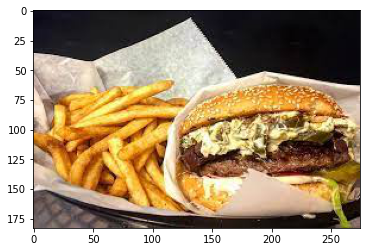

Predicted concepts:
	食品 0.99
	炸薯条 0.99
	茶点 0.99
	餐 0.98
	午餐 0.97
	不健康的 0.96
	晚餐 0.96
	汉堡 0.96
	快速的 0.96
	餐厅 0.96


In [178]:
file_path = 'pics/burger.jpeg'
General_Image_Analysis2(file_path,stub,metadata );